## The purpose of this file
Make an aggregate adjacency matrix and save it.
> Be sure to add $\tau$ (the number of snapshots you make) to the filename.

In [9]:
import sys
sys.path.append('../')
import powerlaw
import networkx as nx
import toolbox as tb
%matplotlib inline

In [10]:
tag = "explore_hiroshima"
hashtag = "じゃけぇ広島に恋しとる" # This variable is necessary for data processing in the module 'toolbox'.
timespan = "21-29"
file = f"../data/datasets/{tag}/{tag}_{timespan}.pkl"
df = tb.get_dataframe(hashtag, file)

In [11]:
tau, snapshots = tb.get_snapshots_closed_intervals(df, 'minutes=30')
#tau, snapshots = tb.get_snapshots_closed_intervals(df, 'hours=1')
print(f"tau = {tau}")

tau = 471


In [12]:
edgelst_of_snapshots = tb.get_edgelist_of_eachsnapshot(df,tau, snapshots)
filename = f'../data/graph_data/{tag}/original/{hashtag}_{timespan}_{tau}_aam'
print(filename)
#G = tb.make_aggregate_adjacency_matrix(edgelst_of_snapshots, fname=filename)
G = tb.make_aggregate_adjacency_matrix(edgelst_of_snapshots)

../data/graph_data/explore_hiroshima/original/じゃけぇ広島に恋しとる_21-29_471_aam


In [13]:
G.number_of_nodes()

2356

In [ ]:
tb.check_degree(G)

In [ ]:
tb.plot_dd(G, 20)

In [ ]:
tb.fit_power_law(G)

In [ ]:
tb.compare_distribution(G,"power_law", "exponential")

In [ ]:
tb.compare_distribution(G,"power_law", "lognormal")

In [ ]:
tb.plot_pdf_ccdf(G)

The following is for when the network created during the entire period is too large to draw the degree distribution (`3_modified_aam.ipynb`) due to lack of memory.

In [14]:
G.remove_node(hashtag)
print(f"Isolates after removal of the searchtag: \n{list(nx.isolates(G))}")
print("These isolate nodes are to be removed.")
G.remove_nodes_from(list(nx.isolates(G)))
assert len(list(nx.isolates(G))) == 0, "There is at least one isolate node left."
print("============================================")
print("The isolate nodes were successfully deleted.")

Isolates after removal of the searchtag: 
[]
These isolate nodes are to be removed.
The isolate nodes were successfully deleted.


In [ ]:
tb.check_degree(G)

In [ ]:
tb.fit_power_law(G)

In [ ]:
tb.compare_distribution(G,"power_law", "exponential")

In [ ]:
tb.compare_distribution(G,"power_law", "lognormal")

In [ ]:
# Save figure for future use
fname1 = f"../data/figure/degree_distribution/pdfccdf1_{tag}_{timespan}_{tau}.pdf"
fname2 = f"../data/figure/degree_distribution/pdfccdf2_{tag}_{timespan}_{tau}.pdf"
print(fname1)
print(fname2)

In [ ]:
#tb.plot_pdf_ccdf(G, Pcolor="#FF7A72", Ccolor="#6AC4BA", fname=fname1)
tb.plot_pdf_ccdf(G, Pcolor="#FF7A72", Ccolor="#6AC4BA")

Calculating best minimal value for power law fit
------------------------------------------------
the fitted parameter alpha: 2.5902591680834037, 
its standard error sigma: 0.0683074801768134, 
k_min: 45.0


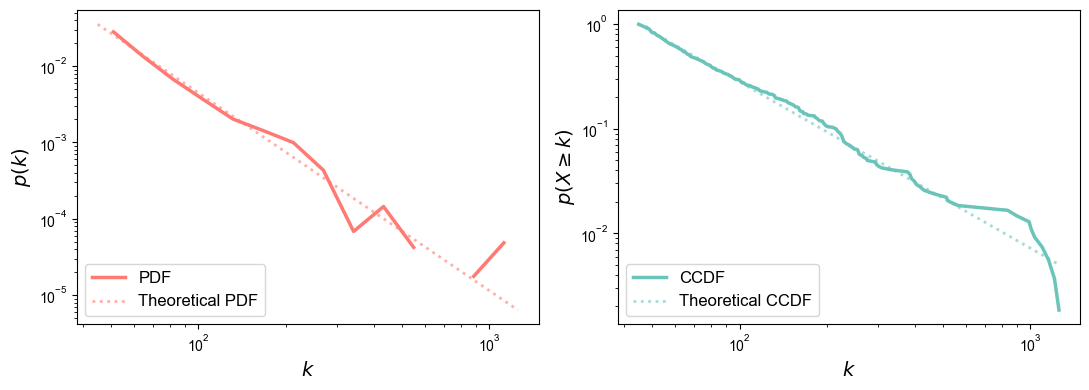

In [8]:
#tb.plot_pdf_ccdf(G, sep=True, Pcolor="#FF7A72", Ccolor="#6AC4BA", fname=fname2)
tb.plot_pdf_ccdf(G, sep=True, Pcolor="#FF7A72", Ccolor="#6AC4BA")

In [15]:
# Save modified aam for statistical test
nx.write_graphml(G, f'../data/graph_data/{tag}/modified/{hashtag}_{timespan}_{tau}_mdaam.graphml', encoding='utf-8')